# Regeression using PyTorch

In [ ]:
import torch
import matplotlib.pyplot as plt

In [ ]:
x = torch.tensor([1,2,3,4,5,6,7,8,9,10.])
x

tensor([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [ ]:
y = 3*x - 4 + torch.normal(mean= torch.zeros(len(x)), std=2)
y

tensor([ 0.7805,  1.8762,  7.8689,  6.8634, 12.0376, 13.9539, 17.2082, 20.4007,
        20.9146, 26.5839])

In [ ]:
y = torch.tensor([ 0.7805,  1.8762,  7.8689,  6.8634, 12.0376, 13.9539, 17.2082, 20.4007,
        20.9146, 26.5839])
y

tensor([ 0.7805,  1.8762,  7.8689,  6.8634, 12.0376, 13.9539, 17.2082, 20.4007,
        20.9146, 26.5839])

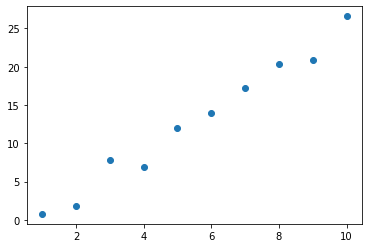

In [ ]:
fig, ax = plt.subplots()
_ = ax.scatter(x,y)

In [ ]:
m = torch.tensor([-2.]).requires_grad_()
m

tensor([-2.], requires_grad=True)

In [ ]:
c = torch.tensor([30.]).requires_grad_()
c

tensor([30.], requires_grad=True)

In [ ]:
def y_line(x_, m_, c_):
  return x_*m_ + c_

In [ ]:
def reg_plot(x_, y_, m_, c_):
  fig, ax = plt.subplots()

  ax.scatter(x_, y_)

  xmin, xmax = ax.get_xlim()
  ymin = y_line(xmin, m_, c_)
  ymax = y_line(xmax, m_, c_)

  ax.set_xlim([xmin, xmax])
  _ = ax.plot([xmin, xmax], [ymin, ymax])

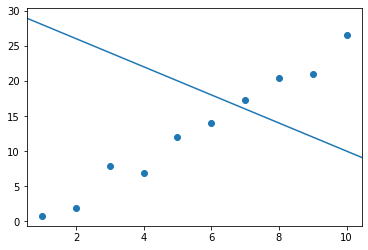

In [ ]:
reg_plot(x,y,m,c)

In [ ]:
y_cap = y_line(x,m,c)
y_cap

tensor([28., 26., 24., 22., 20., 18., 16., 14., 12., 10.],
       grad_fn=<AddBackward0>)

In [ ]:
def error(y_pred, y_actu): 
    sigma = torch.sum((y_pred - y_actu)**2)
    return sigma/len(y_actu)

In [ ]:
e = error(y_cap, y)
e

tensor(228.8883, grad_fn=<DivBackward0>)

In [ ]:
e.backward()

In [ ]:
m.grad

tensor([-11.4476])

In [ ]:
c.grad

tensor([12.3024])

In [ ]:
optimizer = torch.optim.SGD([m, c], lr = .01)

In [ ]:
optimizer.step()

In [ ]:
m

tensor([-1.8855], requires_grad=True)

In [ ]:
c

tensor([29.8770], requires_grad=True)

In [ ]:
y_cap = y_line(x,m,c)
y_cap

tensor([27.9915, 26.1059, 24.2204, 22.3349, 20.4494, 18.5638, 16.6783, 14.7928,
        12.9073, 11.0217], grad_fn=<AddBackward0>)

In [ ]:
error(y_cap, y)

tensor(226.4291, grad_fn=<DivBackward0>)

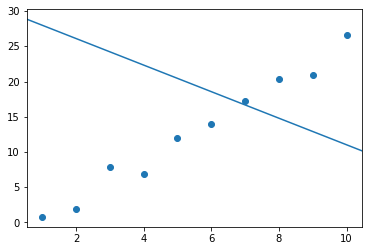

In [ ]:
reg_plot(x,y,m,c)

In [ ]:
epoc = 1000
for epocs in range(epoc):
  optimizer.zero_grad()

  y_cap = y_line(x,m,c)
  e= error(y_cap, y)

  e.backward()
  optimizer.step()

  print('Epoch {}, error {}, m grad {}, c grad {}'.format(epocs, '%.6g' % e.item(), '%.4g' % m.grad.item(), '%.4g' % c.grad.item()))

Epoch 0, error 226.429, m grad -3.986, c grad 13.32
Epoch 1, error 224.518, m grad -2.382, c grad 13.49
Epoch 2, error 222.646, m grad -2.031, c grad 13.48
Epoch 3, error 220.792, m grad -1.95, c grad 13.43
Epoch 4, error 218.953, m grad -1.926, c grad 13.38
Epoch 5, error 217.13, m grad -1.915, c grad 13.32
Epoch 6, error 215.322, m grad -1.906, c grad 13.27
Epoch 7, error 213.529, m grad -1.898, c grad 13.21
Epoch 8, error 211.751, m grad -1.89, c grad 13.16
Epoch 9, error 209.988, m grad -1.882, c grad 13.1
Epoch 10, error 208.239, m grad -1.874, c grad 13.05
Epoch 11, error 206.506, m grad -1.866, c grad 12.99
Epoch 12, error 204.787, m grad -1.858, c grad 12.94
Epoch 13, error 203.082, m grad -1.851, c grad 12.88
Epoch 14, error 201.392, m grad -1.843, c grad 12.83
Epoch 15, error 199.715, m grad -1.835, c grad 12.78
Epoch 16, error 198.053, m grad -1.827, c grad 12.72
Epoch 17, error 196.405, m grad -1.82, c grad 12.67
Epoch 18, error 194.77, m grad -1.812, c grad 12.61
Epoch 19,

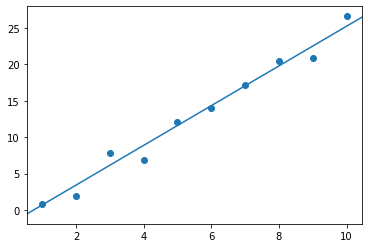

In [ ]:
reg_plot(x,y,m,c)

In [ ]:
m.item()

2.7253897190093994

In [ ]:
c.item()

-2.039680004119873